In [11]:
import sys
sys.path.insert(0, '../scripts')

from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from meal_classifiers import RNNClassifier, CNNClassifier, \
                        TimeSeriesDataset, train, evaluate_meals_by_groups
from unsupervised_helpers import *
import paths
import torch

time_threshold = 60
pellet_count_threshold = 2

In [2]:
ctrl_data = extract_data_full_group(paths.reversal_ivsa_ctrl)

Number of Pellets: 4, n_meals: 133
Number of Pellets: 5, n_meals: 89
Number of Pellets: 3, n_meals: 123
Total 502 meals and keep 345


In [3]:
exp_data = extract_data_full_group(paths.reversal_ivsa_exp)

Number of Pellets: 5, n_meals: 99
Number of Pellets: 4, n_meals: 122
Number of Pellets: 3, n_meals: 202
Total 609 meals and keep 423


### Control Data 3-Pellet

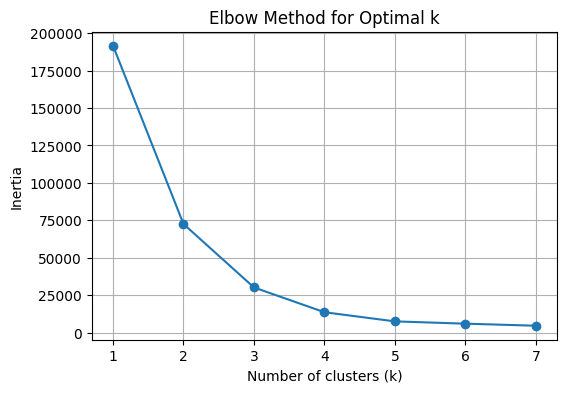

In [4]:
find_k_by_elbow(ctrl_data[3])

Silhouette Score: 0.8469945301310099


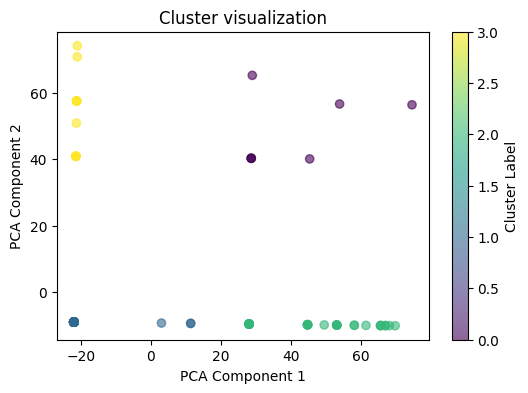

In [5]:
model, meals_by_category = fit_model_single(ctrl_data[3], k=4)

In [9]:
meals_by_category[3][:10]

array([[ 50.        , 100.        ],
       [ 33.33333333, 100.        ],
       [ 40.        , 100.        ],
       [ 50.        , 100.        ],
       [ 33.33333333, 100.        ],
       [ 50.        , 100.        ],
       [ 20.        , 100.        ],
       [ 16.66666667, 100.        ],
       [ 50.        , 100.        ],
       [ 50.        , 100.        ]])

In [10]:
new_good, new_bad = collect_meals_from_categories(meals_by_category, [1, 3])
update_data('./IVSA_ctrl_good.pkl', new_good)
update_data('./IVSA_ctrl_bad.pkl', new_bad)

Old data has 0 items
New data has 85 items
Old data has 0 items
New data has 38 items


#### Control Data 4-Pellet

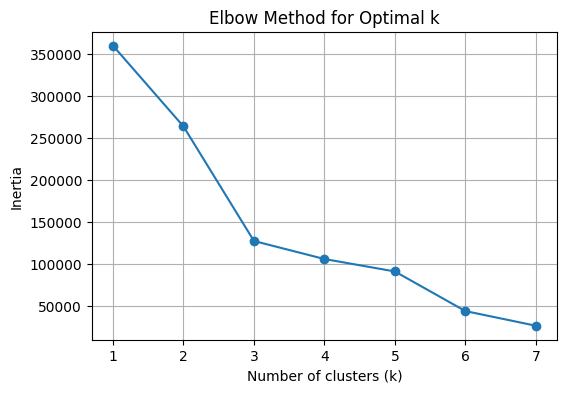

In [11]:
find_k_by_elbow(ctrl_data[4])

Silhouette Score: 0.781191807865991


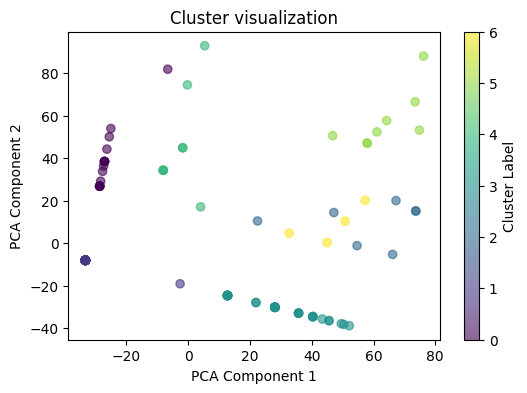

In [13]:
model, meals_by_category = fit_model_single(ctrl_data[4], k=7)

In [20]:
meals_by_category[6][:10]

array([[ 50.        , 100.        ,  20.        ],
       [ 50.        , 100.        ,  33.33333333],
       [ 16.66666667, 100.        ,  10.        ],
       [ 33.33333333, 100.        ,  15.38461538]])

In [21]:
new_good, new_bad = collect_meals_from_categories(meals_by_category, [0, 1])
update_data('./IVSA_ctrl_good.pkl', new_good)
update_data('./IVSA_ctrl_bad.pkl', new_bad)

Old data has 85 items
New data has 154 items
Old data has 38 items
New data has 102 items


#### Control Data 5-Pellet

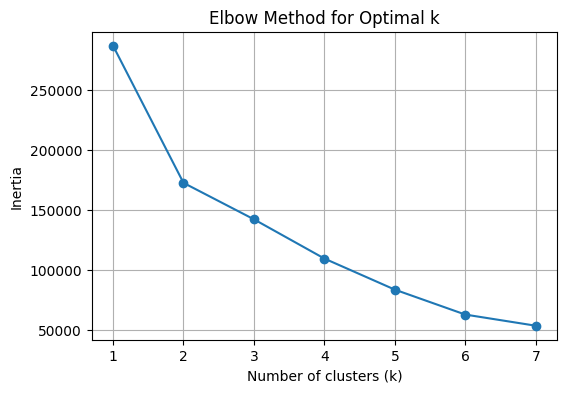

In [22]:
find_k_by_elbow(ctrl_data[5])

Silhouette Score: 0.7538791106089012


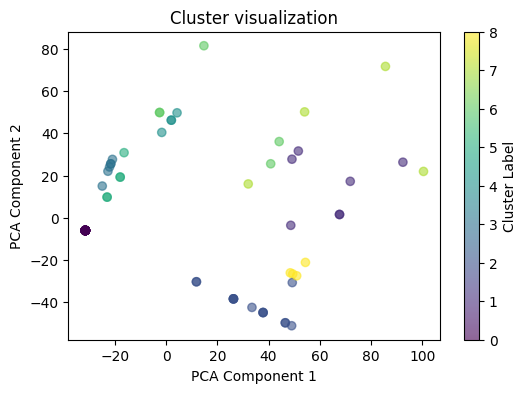

In [23]:
model, meals_by_category = fit_model_single(ctrl_data[5], k=9)

In [33]:
meals_by_category[9][:10]

KeyError: 9

In [34]:
new_good, new_bad = collect_meals_from_categories(meals_by_category, [0, 3])
update_data('./IVSA_ctrl_good.pkl', new_good)
update_data('./IVSA_ctrl_bad.pkl', new_bad)

Old data has 154 items
New data has 200 items
Old data has 102 items
New data has 145 items


#### IVSA Data 3-Pellet

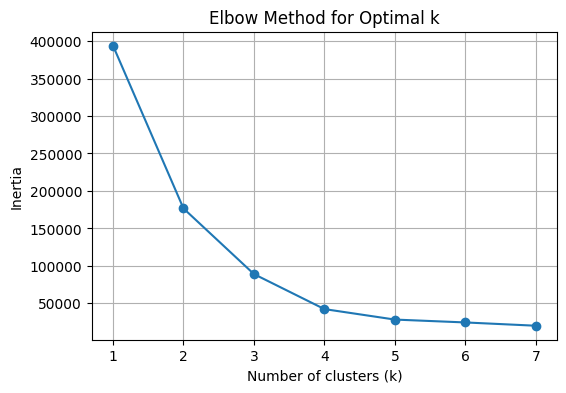

In [35]:
find_k_by_elbow(exp_data[3])

Silhouette Score: 0.7432654883814143


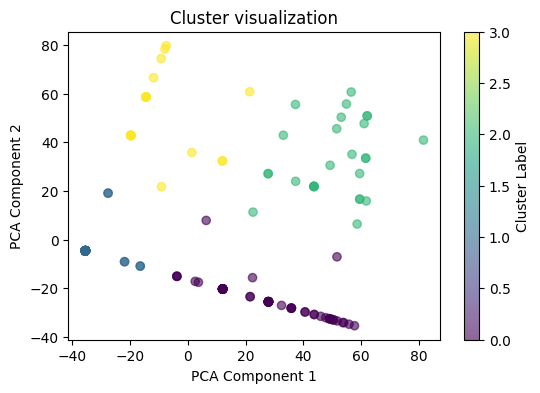

In [43]:
model, meals_by_category = fit_model_single(exp_data[3], k=4)

In [50]:
meals_by_category[4][:20]

KeyError: 4

In [51]:
new_good, new_bad = collect_meals_from_categories(meals_by_category, [1, 3])
update_data('./IVSA_exp_good.pkl', new_good)
update_data('./IVSA_exp_bad.pkl', new_bad)

Old data has 0 items
New data has 108 items
Old data has 0 items
New data has 94 items


#### CASK Data 4-Pellet

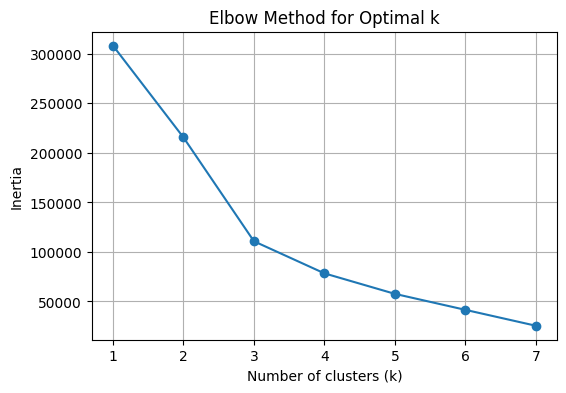

In [52]:
find_k_by_elbow(exp_data[4])

Silhouette Score: 0.7180405233094814


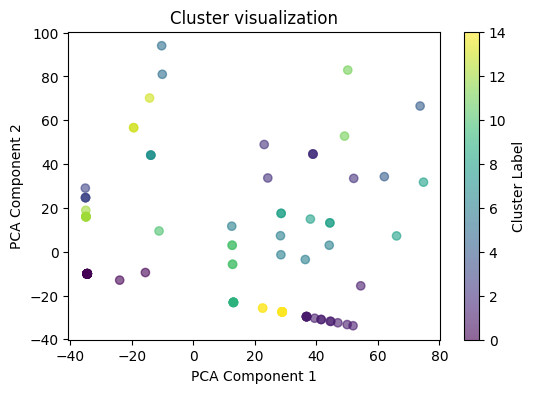

In [81]:
model, meals_by_category = fit_model_single(exp_data[4], k=15)

In [101]:
meals_by_category[15][:10]

KeyError: 15

In [102]:
new_good, new_bad = collect_meals_from_categories(meals_by_category, [0, 3, 12])
update_data('./IVSA_exp_good.pkl', new_good)
update_data('./IVSA_exp_bad.pkl', new_bad)

Old data has 108 items
New data has 163 items
Old data has 94 items
New data has 161 items


#### CASK Data 5-Pellet

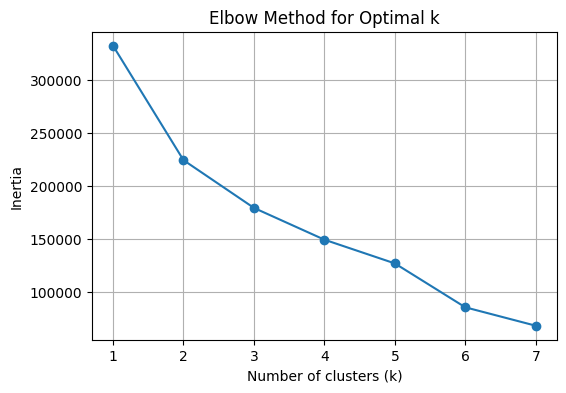

In [103]:
find_k_by_elbow(exp_data[5])

Silhouette Score: 0.6603415983845935


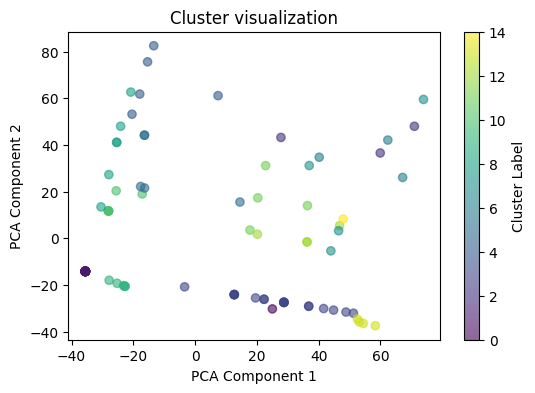

In [114]:
model, meals_by_category = fit_model_single(exp_data[5], k=15)

In [130]:
meals_by_category[15][:10]

KeyError: 15

In [131]:
new_good, new_bad = collect_meals_from_categories(meals_by_category, [1, 4, 10])
update_data('./IVSA_exp_good.pkl', new_good)
update_data('./IVSA_exp_bad.pkl', new_bad)

Old data has 163 items
New data has 203 items
Old data has 161 items
New data has 220 items


### Model Training

In [2]:
ctrl_X, ctrl_y = create_dataset_single_group(experiment='IVSA', ctrl=True)
exp_X, exp_y = create_dataset_single_group(experiment='IVSA', ctrl=False)
np.savez('IVSA_data.npz', ctrl_X=ctrl_X, ctrl_y=ctrl_y, exp_X=exp_X, exp_y=exp_y)

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
data = np.load('IVSA_data.npz')
ctrl_X, ctrl_y, exp_X, exp_y = data['ctrl_X'], data['ctrl_y'], data['exp_X'], data['exp_y']
X, y = merge_dataset(ctrl_X, ctrl_y, exp_X, exp_y)
ctrl_input = torch.Tensor(ctrl_X).to(device)
exp_input = torch.Tensor(exp_X).to(device)

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.1)
print(f'Train Size: {len(y_train)},  Test Size: {len(y_test)}')

Train Size: 691,  Test Size: 77


In [8]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32, device=device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

lr = 0.0001
batch_size = 256
num_epochs = 200
train_dataset = TimeSeriesDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [9]:
model = RNNClassifier(input_size=1, hidden_size=400, num_layers=2, num_classes=2).to(device)
model = train(model, lr, num_epochs, train_loader, X_test_tensor, y_test_tensor)

Ep 10, Loss: 0.5316, Train Acc: 0.8423, Test Acc: 0.8571
Ep 20, Loss: 0.1862, Train Acc: 0.9392, Test Acc: 0.9740
Ep 30, Loss: 0.0760, Train Acc: 0.9783, Test Acc: 0.9870
Ep 40, Loss: 0.0467, Train Acc: 0.9826, Test Acc: 0.9740
Ep 50, Loss: 0.0331, Train Acc: 0.9884, Test Acc: 0.9740
Ep 60, Loss: 0.0296, Train Acc: 0.9899, Test Acc: 0.9740
Ep 70, Loss: 0.0240, Train Acc: 0.9913, Test Acc: 0.9740
Ep 80, Loss: 0.0208, Train Acc: 0.9928, Test Acc: 0.9740
Ep 90, Loss: 0.0195, Train Acc: 0.9913, Test Acc: 0.9740
Ep 100, Loss: 0.0160, Train Acc: 0.9942, Test Acc: 0.9740
Ep 110, Loss: 0.0145, Train Acc: 0.9942, Test Acc: 0.9740
Ep 120, Loss: 0.0137, Train Acc: 0.9942, Test Acc: 0.9740
Ep 130, Loss: 0.0124, Train Acc: 0.9942, Test Acc: 0.9740
Ep 140, Loss: 0.0110, Train Acc: 0.9957, Test Acc: 0.9740
Ep 150, Loss: 0.0117, Train Acc: 0.9942, Test Acc: 0.9740
Ep 160, Loss: 0.0101, Train Acc: 0.9957, Test Acc: 0.9740
Ep 170, Loss: 0.0189, Train Acc: 0.9913, Test Acc: 0.9740
Ep 180, Loss: 0.0099, T

In [12]:
# model = RNNClassifier(input_size=1, hidden_size=400, num_layers=2, num_classes=2).to(device)
# model.load_state_dict(torch.load('../CASK/LSTM_from_CASK.pth'))
model = CNNClassifier(num_classes=2, maxlen=4).to(device)
model.load_state_dict(torch.load('../CASK/CNN_from_CASK.pth'))
evaluate_meals_by_groups(model, ctrl_input, ctrl_y, exp_input, exp_y)

Control Accuracy: 0.983, Exp Accuracy: 0.988
Control Group: 149/345 good meals with proportion of 0.4318840579710145
Experiment Group: 223/423 good meals with proportion of 0.5271867612293144
